In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from pydataset import data
from datetime import date
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from env import get_db_url, user, password, host

#### For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

#### Has the network latency gone up since we switched internet service providers?

H0: There has been no increase in network latency since we switched internet service providers

H1: Network latency has gone up since we switched internet service providers

#### Is the website redesign any good?

H0: There has been no increase in the time customers spend on the website since the redesign.

H1: Customers spend more time on the website since the redesign than they did before the redesign. 

#### Is our television ad driving more sales?

H0: There has been no increase in sales since the premier of the television ad.

H1: Sales have gone up since the premier of the television ad. 

# T-Test

#### Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.


In [2]:
# formulate hypotheses

# H0: mean sales time for Office 1 = mean sales time for Office 2. 
# H1: mean sales time for Office 1 != mean sales time for Office 2.

In [3]:
# get the data

# Office 1
μ1 = 90
σ1 = 15
n1 = 40

# Office 2
μ2 = 100
σ2 = 20
n2 = 50

In [4]:
# establish assumptions

# independent - yes

# approximates a normal distribution - yes (pure assumption, since we don't have access to the data)

# equal variances - no (standard deviations are different)

In [5]:
# perform the test

# T-Test, independent, from stats
α = .05
t, p = stats.ttest_ind_from_stats(μ1, σ1, n1, 
                                  μ2, σ2, n2,
                                  equal_var=False)

In [6]:
# 2 tailed test:
if p < α:
    print('Reject H0.')
else: 
    print('Fail to reject H0.')

Reject H0.


#### Load the mpg dataset and use it to answer the following questions:

In [7]:
cars = data('mpg')
cars['avg_mpg'] = stats.hmean(cars[['cty', 'hwy']], axis=1)

#### Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

In [8]:
# establish hypotheses

# H0: avg_mpg for cars from 2008  = avg_mpg for cars from 1999
# H1: avg_mpg for cars from 2008 != avg_mpg for cars from 1999

In [9]:
# get the data

# cars from 2008
cars_08 = cars[cars.year == 2008]

# cars from 1999
cars_99 = cars[cars.year == 1999]


08 n:  117
08 distribution:


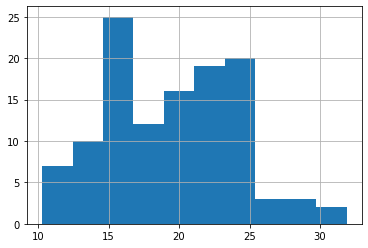


99 n:  117
99 distribution:


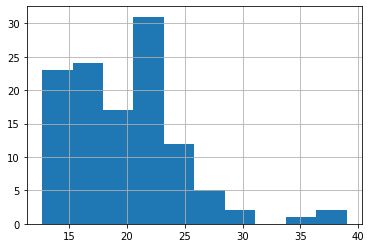

In [10]:
# confirm assumptions

# independent - yes

# approximates a normal distribution - yes (see below)

print('\n08 n: ', cars_08.avg_mpg.shape[0])
print('08 distribution:')
cars_08.avg_mpg.hist()
plt.show()

print('\n99 n: ', cars_99.avg_mpg.shape[0])
print('99 distribution:')
cars_99.avg_mpg.hist()
plt.show()

In [11]:
# equal variances - yes (see below)

print('08 variance: ', cars_08.avg_mpg.var())
print('99 variance: ', cars_99.avg_mpg.var())

stats.levene(cars_08.avg_mpg, cars_99.avg_mpg)

08 variance:  22.550836772260343
99 variance:  25.850396545865912


LeveneResult(statistic=0.031071867429515194, pvalue=0.8602339200830025)

In [12]:
# conduct the test

# T-Test, independent
α = .05
t, p = stats.ttest_ind(cars_08.avg_mpg, 
                       cars_99.avg_mpg,
                       equal_var=True)
t, p

(-0.3011962975077886, 0.7635345888327115)

In [13]:
# evaluate

# 2 tailed evaluation:
if p < α:
    print('Reject H0.')
else: 
    print('Fail to reject H0.')

Fail to reject H0.


#### Are compact cars more fuel-efficient than the average car?

In [14]:
# formulate hypotheses

# H0: mean avg_mpg for compact cars = mean avg_mpg for all cars in the dataset
# H1: mean avg_mpg for compact cars > mean avg_mpg for all cars in the dataset

In [15]:
# get the data

# compact cars
compacts = cars[cars['class'] == 'compact']

# mean fuel efficiency (avg_mpg) for all cars
μ_pop = cars.avg_mpg.mean()


compacts n:  47
compacts distribution:


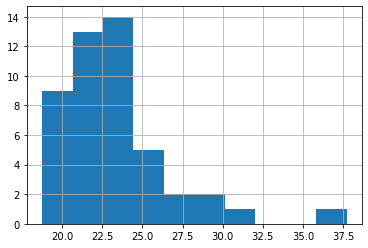

In [16]:
# establish assumptions

# approximates a normal distribution - yes (see below)

print('\ncompacts n: ', compacts.avg_mpg.shape[0])
print('compacts distribution:')
compacts.avg_mpg.hist()
plt.show()

In [17]:
# conduct the test

# T-test
α = .05
t, p = stats.ttest_1samp(compacts.avg_mpg, μ_pop)
t, p

(7.512360093161354, 1.5617666348807727e-09)

In [18]:
#evaluate

# 1 tailed, greater than
if p/2 < α and t > 0 :
    print('Reject H0.')
else: 
    print('Fail to reject H0.')

Reject H0.


#### Do manual cars get better gas mileage than automatic cars?

In [19]:
# formulate hypotheses

# H0: mean avg_mpg for manual cars = mean avg_mpg for automatic cars
# H1: mean avg_mpg for manual cars > mean avg_mpg for automatic cars

In [20]:
# get the data

# manual cars
manuals = cars[cars.trans.str.contains('manual')]

# automatic cars
autos = cars[cars.trans.str.contains('auto')]


manuals n:  77
manuals distribution:


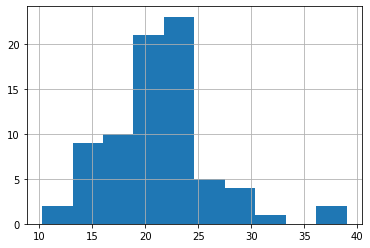


autos n:  117
autos distribution:


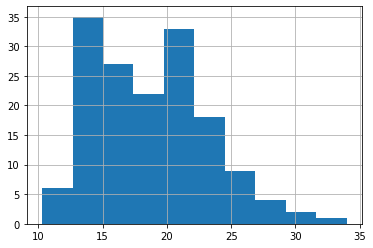

In [21]:
# establish assumptions

# independent - yes

# approximates a normal distribution - yes (see below)

print('\nmanuals n: ', manuals.avg_mpg.shape[0])
print('manuals distribution:')
manuals.avg_mpg.hist()
plt.show()

print('\nautos n: ', cars_08.avg_mpg.shape[0])
print('autos distribution:')
autos.avg_mpg.hist()
plt.show()

In [22]:
# equal variances - yes (see below)

print('manuals variance: ', manuals.avg_mpg.var())
print('autos variance: ', autos.avg_mpg.var())

stats.levene(manuals.avg_mpg, autos.avg_mpg)

manuals variance:  25.665633639828275
autos variance:  20.428279095002054


LeveneResult(statistic=0.013901207169738269, pvalue=0.9062462281015493)

In [23]:
# conduct the test

# T-Test, independent
α = .05
t, p = stats.ttest_ind(manuals.avg_mpg, autos.avg_mpg, equal_var=True)

In [24]:
# evaluate

# 1 tailed, greater than
if p/2 < α and t > 0 :
    print('Reject H0.')
else: 
    print('Fail to reject H0.')

Reject H0.


# Correlation Testing

### 1. Use the telco_churn data. 

In [25]:
df = pd.read_csv('telco_data.csv')
df = df.rename(columns={'tenure_in_months': 'tenure'})
df = df.dropna()

### 1a. Does tenure correlate with monthly charges?

In [26]:
# H0: There is no linear relationship between monthly charges and tenure
# H1: There is a linear relationship between monthly charges and tenure

alpha = .05
r, p = stats.pearsonr(df.monthly_charges, df.tenure)
r, p

(0.2461667830592631, 1.1952280772800575e-97)

In [27]:
if p < alpha:
    print('Reject H0')
else: 
    print('Fail to reject H0')

Reject H0


### 1b. Does tenure correlate with total charges?

In [28]:
# H0: There is no linear relationship between total charges and tenure
# H1: There is a linear relationship between total charges and tenure

alpha = .05
corr, p = stats.pearsonr(df.total_charges, df.tenure)
corr, p

(0.8258274352556676, 0.0)

In [29]:
if p < alpha:
    print('Reject H0')
else: 
    print('Fail to reject H0')

Reject H0


### 1c. What happens if you control for phone and internet service?

In [30]:
# split the data

# phone service splits
no_phone_customers = df[df.phone_service_desc == 'No Phone Service']
one_line_customers = df[df.phone_service_desc == 'One Line']
two_line_customers = df[df.phone_service_desc == 'Two or More Lines']

# internet service splits
no_internet_customers = df[df.internet_service_desc == 'No Internet Service']
dsl_customers = df[df.internet_service_desc == 'DSL']
fiber_customers = df[df.internet_service_desc == 'Fiber Optic']

#### controlling for phone service - tenure vs monthly charges:

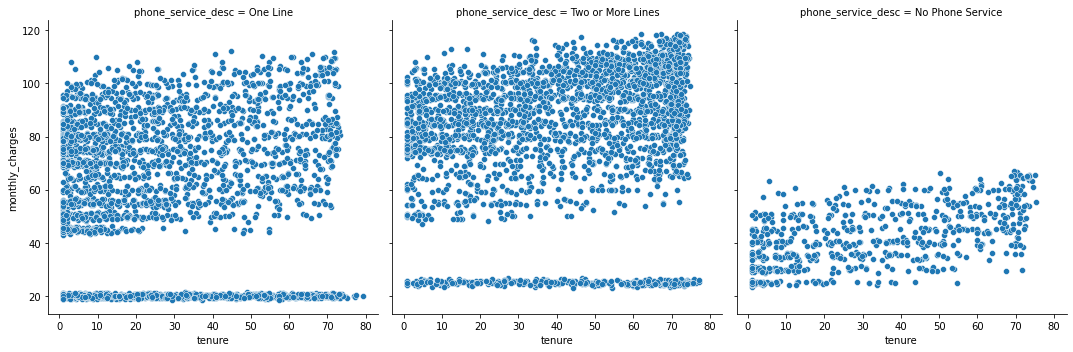

In [31]:
# visualize the data
sns.relplot(df.tenure, df.monthly_charges, col=df.phone_service_desc)
plt.show()

In [32]:
# perform tests

# H0: There is no linear relationship between monthly charges and tenure
# H1: There is a linear relationship between monthly charges and tenure

r, p = stats.pearsonr(one_line_customers.tenure, one_line_customers.monthly_charges)
print('One Line r = ', r, '\nOne Line p = ', p)

r, p = stats.pearsonr(two_line_customers.tenure, two_line_customers.monthly_charges)
print('\nTwo Line r = ', r, '\nTwo Line p = ', p)

r, p = stats.pearsonr(no_phone_customers.tenure, no_phone_customers.monthly_charges)
print('\nNo Phone r = ', r, '\nNo Phone p = ', p)

One Line r =  0.061770186176666395 
One Line p =  0.000319935563296208

Two Line r =  0.13547655145070261 
Two Line p =  1.2581494344303698e-13

No Phone r =  0.5929000576223008 
No Phone p =  7.050238802215818e-66


#### conclusions:

For each phone service type, the p value is less than our alpha of .05, so we can reject the null hypothesis that there is no linear relationship between tenure and monthly charges. 

However, we now see that the linear relationship is much stronger for customers with no phone service than for customers with either one line or two lines. 

It also appears based on our visualizations, that if, within the one line and two line groups, we controlled for monthly charges greater than 30 vs monthly charges less than 30, we would see a linear relationship for the > 30 group and not for the < 30 group. 

#### controlling for phone service, tenure vs total_charges

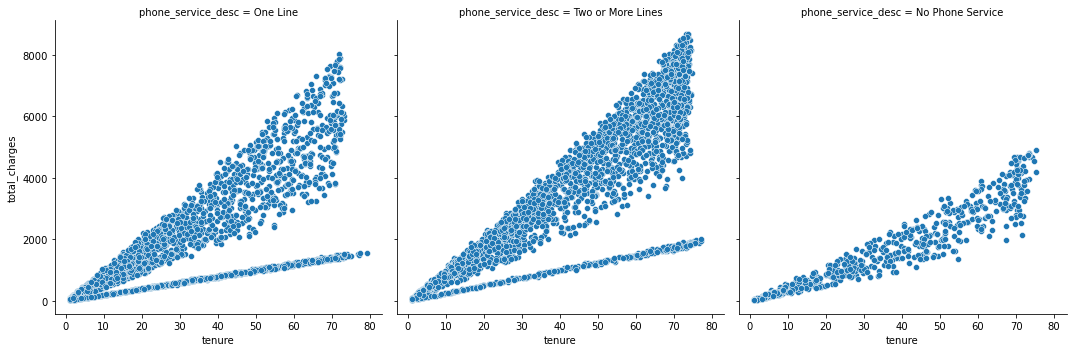

In [33]:
# visualize the data
sns.relplot(df.tenure, df.total_charges, col=df.phone_service_desc)
plt.show()

In [34]:
# perform tests

# H0: There is no linear relationship between total charges and tenure
# H1: There is a linear relationship between total charges and tenure

r, p = stats.pearsonr(one_line_customers.tenure, one_line_customers.total_charges)
print('One Line r = ', r, '\nOne Line p = ', p)

r, p = stats.pearsonr(two_line_customers.tenure, two_line_customers.total_charges)
print('\nTwo Line r = ', r, '\nTwo Line p = ', p)

r, p = stats.pearsonr(no_phone_customers.tenure, no_phone_customers.total_charges)
print('\nNo Phone r = ', r, '\nNo Phone p = ', p)

One Line r =  0.772113247580787 
One Line p =  0.0

Two Line r =  0.8418338944266728 
Two Line p =  0.0

No Phone r =  0.9542988226760583 
No Phone p =  0.0


#### conclusions:

For each phone service type, the p value is less than our alpha of .05, so we can reject the null hypothesis that there is no linear relationship between tenure and total charges. 

We see that, while there is a strong linear relationship for each type, the strength of the relationship varies between the groups.

We can also see from our visualizations that there is likely another factor that, if controlled for, would further refine our results (we know from the previous monthly charges test, that this is likely to be monthly charges greater or less than 30). 

#### controlling for internet service - tenure vs. monthly charges

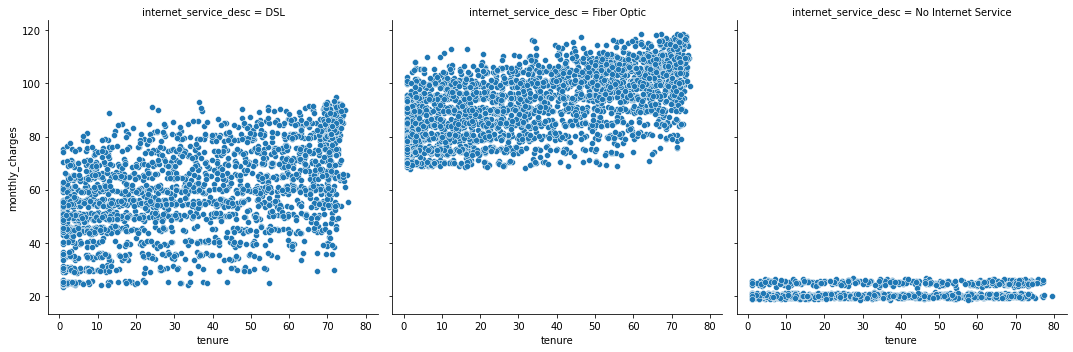

In [35]:
# visualize the data
sns.relplot(df.tenure, df.monthly_charges, col=df.internet_service_desc)
plt.show()

In [36]:
# perform tests

# H0: There is no linear relationship between monthly charges and tenure
# H1: There is a linear relationship between monthly charges and tenure

r, p = stats.pearsonr(dsl_customers.tenure, dsl_customers.monthly_charges)
print('DSL r = ', r, '\nDSL p = ', p)

r, p = stats.pearsonr(fiber_customers.tenure, fiber_customers.monthly_charges)
print('\nFiber r = ', r, '\nFiber p = ', p)

r, p = stats.pearsonr(no_internet_customers.tenure, no_internet_customers.monthly_charges)
print('\nNo Internet r = ', r, '\nNo Internet p = ', p)

DSL r =  0.5202786637122057 
DSL p =  9.125186958707854e-168

Fiber r =  0.6249319643877032 
Fiber p =  0.0

No Internet r =  0.34630627233388506 
No Internet p =  3.76146409297443e-44


#### conclusions:

With p values of less than alpha=.05 in each group, we can reject our null hypothesis that there is no linear relationship between tenure and monthly charges. 

We can see that the strength of the correlation varies across categories, and is quite low for the customers with no internet service. 

We see from our visualization that the effect size is almost 0 for customers with no internet service, but appears to be significant in the the other categores. 

#### controlling for internet service - tenure vs. total charges

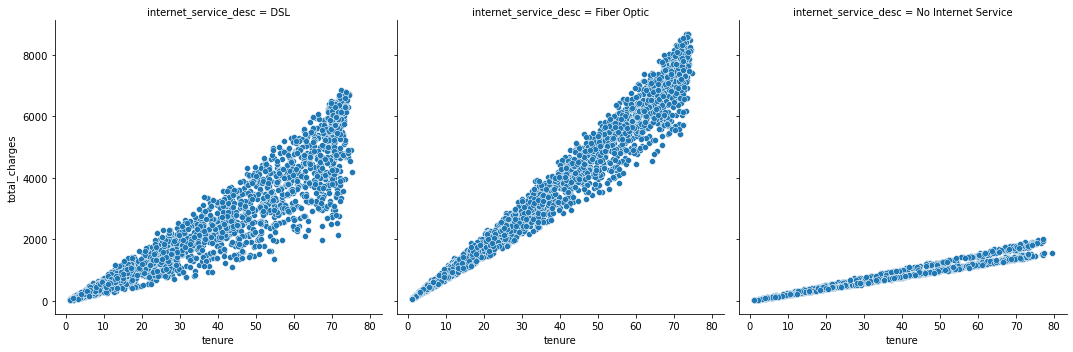

In [37]:
# visualize the data
sns.relplot(df.tenure, df.total_charges, col=df.internet_service_desc)
plt.show()

In [38]:
# perform tests

# H0: There is no linear relationship between total charges and tenure
# H1: There is a linear relationship between total charges and tenure

r, p = stats.pearsonr(dsl_customers.tenure, dsl_customers.total_charges)
print('DSL r = ', r, '\nDSL p = ', p)

r, p = stats.pearsonr(fiber_customers.tenure, fiber_customers.total_charges)
print('\nFiber r = ', r, '\nFiber p = ', p)

r, p = stats.pearsonr(no_internet_customers.tenure, no_internet_customers.total_charges)
print('\nNo Internet r = ', r, '\nNo Internet p = ', p)

DSL r =  0.9418473257729845 
DSL p =  0.0

Fiber r =  0.9859644622177636 
Fiber p =  0.0

No Internet r =  0.9842996702804292 
No Internet p =  0.0


#### conclusions

With p values of less than alpha=.05 in each group, we can reject our null hypothesis that there is no linear relationship between tenure and monthly charges. 

We see that the strength of the correlation is high in all categories. 

We see from our visualization that the effect size is almost 0 for customers with no internet service, but appears to be significant in the the other categores. 

## Control for both phone and internet service categories - the python way

In [39]:
def correlate_tenure_and_monthly_charges(df):
    return pd.Series(stats.pearsonr(df.tenure, df.monthly_charges), index=['r', 'p'])

df.groupby(['internet_service_desc', 'phone_service_desc']).apply(correlate_tenure_and_monthly_charges)

r              p
internet_service_desc phone_service_desc                         
DSL                   No Phone Service    0.592900   7.050239e-66
                      One Line            0.562415   2.265525e-88
                      Two or More Lines   0.610210   1.627032e-71
Fiber Optic           One Line            0.529991   5.361511e-85
                      Two or More Lines   0.573826  3.923298e-170
No Internet Service   One Line           -0.013588   6.405793e-01
                      Two or More Lines  -0.031281   5.654245e-01

In [40]:
def correlate_tenure_and_total_charges(df):
    return pd.Series(stats.pearsonr(df.tenure, df.total_charges), index=['r', 'p'])

df.groupby(['internet_service_desc', 'phone_service_desc']).apply(correlate_tenure_and_total_charges)

r    p
internet_service_desc phone_service_desc               
DSL                   No Phone Service    0.954299  0.0
                      One Line            0.974360  0.0
                      Two or More Lines   0.967059  0.0
Fiber Optic           One Line            0.987482  0.0
                      Two or More Lines   0.983950  0.0
No Internet Service   One Line            0.999278  0.0
                      Two or More Lines   0.998036  0.0

### 2. Use the employees database.

In [41]:
url = get_db_url('employees')

In [42]:
sql = '''
SELECT e.emp_no, e.hire_date, s.salary 
  FROM employees e
  JOIN salaries s USING(emp_no)
  WHERE s.to_date = '9999-01-01';
'''
employees = pd.read_sql(sql, url)

# note: we filtered for only current employees
#       and their current salaries

In [43]:
sql = '''
SELECT emp_no, COUNT(title) AS n_titles
  FROM titles
  WHERE emp_no IN (SELECT emp_no
                     FROM salaries
                     WHERE to_date = '9999-01-01')
  GROUP BY emp_no;
'''
titles = pd.read_sql(sql, url)

# note: we filtered for only current employees,
#       but retained their historical title entries

In [44]:
# returns time employee has been with company as number of days with data type: pandas timedelta
employees['tenure'] = date.today() - employees.hire_date

# convert timedelta to string, i.e. '13021 days'
employees['tenure'] = employees.tenure.astype(str)

# removes the last five digits of the time string, leaving only the number
employees['tenure'] = employees.tenure.apply(lambda string: string[:-5])

# converts string representing number of days to int
employees['tenure'] = employees.tenure.astype(int)

# join titles df to existing employees df
employees = pd.concat([employees, titles], join='inner', axis=1)

### 2a. Is there a relationship between how long an employee has been with the company and their salary?

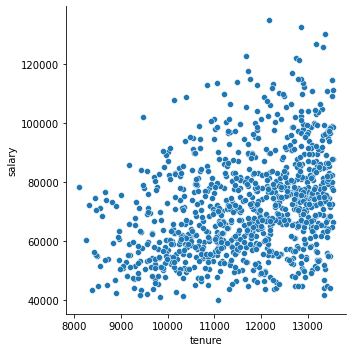

In [45]:
# visualize
np.random.seed(123)
employees_sample = employees.sample(1000)
sns.relplot(employees_sample.tenure, employees_sample.salary)
plt.show()

In [46]:
# H0: There is no linear relationship between tenure and salary
# H1: There is a linear relationship between tenure and salary

# perform test
corr, p = stats.pearsonr(employees.tenure, employees.salary)
corr, p

(0.30646256131860894, 0.0)

In [47]:
# conclusion
if p < alpha:
    print('Reject H0')
else: 
    print('Fail to reject H0')

Reject H0


#### 2b. Is there a relationship between how long an employee has been with the company and the number of titles they have had?

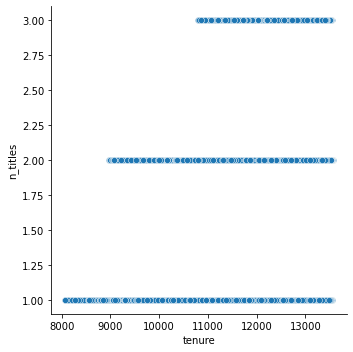

In [48]:
# visualize
sns.relplot(employees.tenure, employees.n_titles)
plt.show()

In [49]:
# H0: There is no linear relationship between tenure and number of titles
# H1: There is a linear relationship between tenure and number of titles

# perform tests

corr, p = stats.pearsonr(employees.tenure, employees.n_titles)
corr, p

(0.2871267889699541, 0.0)

In [50]:
# conclusion

if p < alpha:
    print('Reject H0')
else: 
    print('Fail to reject H0')

Reject H0


#### 3. Use the sleepstudy data. Is there a relationship between days and reaction time?

In [51]:
sleepstudy = data('sleepstudy')

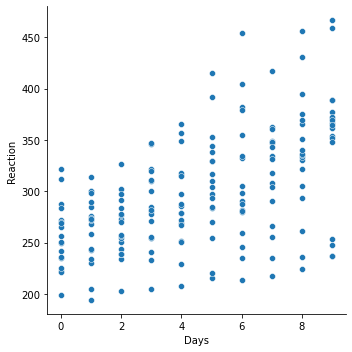

In [52]:
# visualize
sns.relplot(sleepstudy.Days, sleepstudy.Reaction)
plt.show()

In [53]:
# H0: There is no linear relationship between days and reaction time
# H1: There is a linear relationship between days and reaction time

# perform test 
r, p = stats.pearsonr(sleepstudy.Days, sleepstudy.Reaction)
r, p

(0.5352302262650253, 9.894096322214812e-15)

In [54]:
# conclusion

if p < alpha:
    print('Reject H0')
else: 
    print('Fail to reject H0')

Reject H0


# Chi-Squared 

In [55]:
# defining a function to encapsulate repeated code for chi2 tests:

def chi2_test(data_for_category1, data_for_category2, alpha=.05):
    
    # create dataframe of observed values
    observed = pd.crosstab(data_for_category1, data_for_category2)
    
    # conduct test using scipy.stats.chi2_contingency() test
    chi2, p, degf, expected = stats.chi2_contingency(observed)
    
    # round the expected values
    expected = expected.round(1)
    
    # output
    print('Observed\n')
    print(observed.values)
    print('---\nExpected\n')
    print(expected)
    print('---\n')
    print(f'chi^2 = {chi2:.4f}')
    print(f'p     = {p:.4f}')
    
    # evaluate the hypothesis against the established alpha value
    if p < alpha:
        print('\nReject H0')
    else: 
        print('\nFail to Reject H0')

#### 1. Use the given contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

In [56]:
# establish hypotheses

# H0: Having a macbook is independent of being a codeup student
# H1: Having a macbook is not independent of being a codeup student

In [72]:
# create the dataframe of observed values

index = ['macbook', 'not_macbook']
columns = ['codeup', 'not_codeup']

observed = pd.DataFrame([[49, 20], [1, 30]], index=index, columns=columns)

# set n
n = observed.values.sum()

In [75]:
# run the test

alpha = .05
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[49 20]
 [ 1 30]]
---
Expected

[[34.5 34.5]
 [15.5 15.5]]
---

chi^2 = 36.6526
p     = 0.0000


In [59]:
# conclusion
if p < alpha:
    print('Reject H0')
else: 
    print('Fail to Reject H0')

Reject H0


#### 2. Choose another 2 categorical variables from the mpg dataset and perform a chi2 contingency table test with them. Be sure to state your null and alternative hypotheses.

In [60]:
# get the data
cars = data('mpg')
cars = cars.rename(columns={'class': 'type'})

In [61]:
# establish hypotheses

# H0: cyl is independent of fl
# H1: cyl is not independent of fl

In [62]:
# run the test
chi2_test(cars.cyl, cars.fl)

Observed

[[ 1  3  0 22 55]
 [ 0  0  0  0  4]
 [ 0  1  1 17 60]
 [ 0  1  7 13 49]]
---
Expected

[[ 0.3  1.7  2.8 18.  58.2]
 [ 0.   0.1  0.1  0.9  2.9]
 [ 0.3  1.7  2.7 17.6 56.7]
 [ 0.3  1.5  2.4 15.6 50.3]]
---

chi^2 = 19.2459
p     = 0.0828

Fail to Reject H0


#### 3. Use the data from the employees database to answer these questions:

In [63]:
url = get_db_url('employees')

In [64]:
sql = '''
SELECT e.emp_no, e.gender, d.dept_name
  FROM employees e 
    JOIN dept_emp de USING(emp_no)
    JOIN departments d USING(dept_no)
  WHERE emp_no IN (
                   SELECT emp_no
                     FROM dept_emp
                     WHERE to_date = '9999-01-01'
                  );
'''
employees_departments = pd.read_sql(sql, url)

In [65]:
sql = '''
SELECT e.emp_no, e.gender
  FROM employees e
  WHERE emp_no IN (
                   SELECT emp_no
                     FROM dept_manager
                   )
    AND emp_no IN (
                   SELECT emp_no 
                     FROM dept_emp
                     WHERE to_date = '9999-01-01'
                   );
'''
mgrs = pd.read_sql(sql, url)

In [66]:
sql = '''
SELECT e.emp_no, e.gender
  FROM employees e
  WHERE emp_no NOT IN (
                       SELECT emp_no
                         FROM dept_manager
                       )
    AND emp_no IN (
                   SELECT emp_no 
                     FROM dept_emp
                     WHERE to_date = '9999-01-01'
                   );
'''
not_mgrs = pd.read_sql(sql, url)

In [67]:
mgrs['status'] = 'manager'
not_mgrs['status'] = 'not manager'
manager_status = pd.concat([mgrs, not_mgrs])

#### 3a. Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

In [68]:
# Establish hypotheses

# H0: an employees gender is independent of whether they work in sales or work in marketing
# H1: an employees gender is not independent of whether they work in sales or work in marketing

In [69]:
# run the test
chi2_test(employees_departments.gender,
          employees_departments.dept_name)

Observed

[[ 7598 27355  5584  5709  6429 23558  6422  6770 16698]
 [11380 41037  8266  8551  9823 35148  9568 10134 25302]]
---
Expected

[[ 7590.5 27354.3  5539.5  5703.5  6500.2 23480.2  6395.4  6761.  16798.4]
 [11387.5 41037.7  8310.5  8556.5  9751.8 35225.8  9594.6 10143.  25201.6]]
---

chi^2 = 3.5517
p     = 0.8951

Fail to Reject H0


#### 3b. Is an employee's gender independent of whether or not they are or have been a manager?

In [70]:
# Establish hypotheses

# H0: an employee's gender is independent of whether or not they have been a manager
# H1: an employee's gender is not independent of whether or not they have been a manager

In [71]:
chi2_test(manager_status.gender,
          manager_status.status)

Observed

[[    13  95997]
 [    11 144103]]
---
Expected

[[9.600000e+00 9.600040e+04]
 [1.440000e+01 1.440996e+05]]
---

chi^2 = 1.4644
p     = 0.2262

Fail to Reject H0
